In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [143]:
pd.options.display.float_format = "{:.2f}".format

<img src="11.PNG"  style="width:900px;" align="center">

### Accessing the Data

In [3]:
transactions = pd.read_csv('/Users/srinidhimaringanti/Desktop/Projects/Data Analysis/transactions.csv')

In [4]:
products = pd.read_csv('/Users/srinidhimaringanti/Desktop/Projects/Data Analysis/products.csv')

In [5]:
markets = pd.read_csv('/Users/srinidhimaringanti/Desktop/Projects/Data Analysis/markets.csv')

In [6]:
customers = pd.read_csv('/Users/srinidhimaringanti/Desktop/Projects/Data Analysis/customers.csv')

In [7]:
date = pd.read_csv('/Users/srinidhimaringanti/Desktop/Projects/Data Analysis/date.csv')

### Showing All the Tables

In [8]:
transactions.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR
1,Prod001,Cus002,Mark002,2018-05-08,3,-1.00,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR


In [14]:
products.head(3)

,product_code,product_type
0,Prod001,Own Brand
1,Prod002,Own Brand
2,Prod003,Own Brand


In [15]:
customers.head(3)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar


In [16]:
markets.head(3)

,markets_code,markets_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North


In [17]:
date.head(3)

,date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun
1,2017-06-02,2017-06-01,2017,June,17-Jun
2,2017-06-03,2017-06-01,2017,June,17-Jun


# Transactions

In [ ]:
#transactions.dtypes

product_code      object
customer_code     object
market_code       object
order_date        object
sales_qty          int64
sales_amount     float64
currency          object
dtype: object

### Check null values

In [18]:
transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

### sales_amout below 1

In [19]:
transactions[transactions['sales_amount'] <= 0].sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
80530,Prod266,Cus015,Mark003,2020-05-18,1,0.00,INR
141983,Prod327,Cus027,Mark003,2019-10-17,1,0.00,INR
23715,Prod098,Cus003,Mark006,2018-09-26,1,0.00,INR


In [20]:
len(transactions[transactions['sales_amount'] <= 0])

1611

In [21]:
transactions.shape

(150283, 7)

In [22]:
transactions.drop(transactions[transactions['sales_amount'] <= 0].index, inplace=True)

In [23]:
transactions.shape

(148672, 7)

### USD to INR conversation

In [25]:
transactions['currency'].unique()

array(['INR', 'USD'], dtype=object)

In [26]:
transactions[transactions['currency'] == 'USD']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500.00,USD
287,Prod003,Cus005,Mark004,2017-11-22,36,250.00,USD


In [30]:
transactions[transactions['currency'] == 'USD']['sales_amount']

5     500.00
6     250.00
286   500.00
287   250.00
Name: sales_amount, dtype: float64

In [31]:
val = transactions[transactions['currency'] == 'USD'].index

In [32]:
val

Index([5, 6, 286, 287], dtype='int64')

In [33]:
for x in val:
    transactions.at[x,'sales_amount'] = transactions.at[x,'sales_amount']*86
    transactions.at[x,'currency'] = 'INR'

In [34]:
transactions.loc[val]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,43000.00,INR
6,Prod003,Cus005,Mark004,2017-11-22,36,21500.00,INR
286,Prod003,Cus005,Mark004,2017-11-20,59,43000.00,INR
287,Prod003,Cus005,Mark004,2017-11-22,36,21500.00,INR


### Adding column product_price

In [35]:
transactions['product_price'] = transactions['sales_amount'] / transactions['sales_qty']

In [36]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00


In [ ]:
#transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
product_price    0
dtype: int64

### Adding column original_price
#### original_price refers to product price without profit

In [38]:
def calc_perc(y):
    profit = 8
    
    if y > 4000:
        profit = 23
    elif y > 3000:
        profit = 19
    elif y > 2000:
        profit = 17
    elif y > 1000:
        profit = 15
    elif y > 500:
        profit = 13
    elif y > 100:
        profit = 11
    else:
        profit = 8
        
    return profit    

In [39]:
transactions['profit_percentage'] = transactions['product_price'].apply(calc_perc)

In [40]:
transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15
5,Prod003,Cus005,Mark004,2017-11-20,59,43000.00,INR,728.81,13


In [41]:
transactions.shape

(148672, 9)

In [42]:
transactions['profit_percentage'].isnull().sum()

0

In [43]:
transactions.isnull().sum()

product_code         0
customer_code        0
market_code          0
order_date           0
sales_qty            0
sales_amount         0
currency             0
product_price        0
profit_percentage    0
dtype: int64

In [44]:
transactions['original_price'] = (transactions['product_price'] - (transactions['product_price']*(transactions['profit_percentage'] / 100)))

In [45]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60


### Adding column profit

In [46]:
transactions['profit'] = transactions['product_price']*(transactions['profit_percentage'] / 100)

In [47]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40


### Adding Column total_profit

In [48]:
transactions['total_profit'] = (transactions['sales_qty'])*(transactions['product_price']*(transactions['profit_percentage'] / 100))

In [49]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40


### Adding column total_cost

In [50]:
transactions['total_cost'] = (transactions['sales_amount'])-(transactions['total_profit'])

In [51]:
transactions.head(4)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49
2,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75,761.25
3,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79,507.21
4,Prod002,Cus004,Mark003,2018-06-18,6,7176.00,INR,1196.00,15,1016.60,179.40,1076.40,6099.60


### verifying values

In [52]:
transactions['sales_amount'].sum()

986693268.0

In [ ]:
transactions['total_cost'].sum()

849390083.9

In [54]:
transactions['total_profit'].sum()

137303184.1

In [55]:
(transactions['total_cost'].sum() + transactions['total_profit'].sum()) - transactions['sales_amount'].sum()

0.0

In [56]:
transactions.shape

(148672, 13)

# Products

In [57]:
products.head(3)

,product_code,product_type
0,Prod001,Own Brand
1,Prod002,Own Brand
2,Prod003,Own Brand


In [58]:
products['product_type'].unique()

array(['Own Brand', 'Distribution'], dtype=object)

In [59]:
products['product_code'].nunique()

279

In [60]:
len(products[products['product_type'] == 'Own Brand'])

191

In [61]:
len(products[products['product_type'] == 'Distribution'])

88

In [62]:
transactions['product_code'].nunique()

338

In [78]:
prod_code1 = pd.Series(products['product_code'].unique())
prod_code1.tail()

333    Prod335
334    Prod336
335    Prod337
336    Prod338
337    Prod339
dtype: object

In [79]:
prod_code2 = pd.Series(transactions['product_code'].unique())
prod_code2.tail()

333    Prod335
334    Prod336
335    Prod337
336    Prod338
337    Prod339
dtype: object

In [80]:

for x in range(279, 338):
    new_row = pd.DataFrame({'product_code': [prod_code2[x]], 'product_type': ['Own Brand']})
    products = pd.concat([products, new_row], ignore_index=True)


In [81]:
products['product_code'].nunique()

338

In [82]:
products.tail()

,product_code,product_type
392,Prod335,Own Brand
393,Prod336,Own Brand
394,Prod337,Own Brand
395,Prod338,Own Brand
396,Prod339,Own Brand


In [83]:
transactions.shape

(148672, 13)

In [84]:
transactions2 = pd.merge(transactions, products, how='inner', on='product_code')

In [85]:
transactions2.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type
74375,Prod260,Cus001,Mark010,2017-12-13,11,1120.00,INR,101.82,11,90.62,11.20,123.20,996.80,Own Brand
177479,Prod318,Cus003,Mark003,2019-05-24,1,750.00,INR,750.00,13,652.50,97.50,97.50,652.50,Own Brand
29313,Prod113,Cus005,Mark004,2018-07-09,1,370.00,INR,370.00,11,329.30,40.70,40.70,329.30,Distribution


In [86]:
transactions2.shape

(203271, 14)

# Customers

In [87]:
customers.head(3)

,customer_code,custmer_name,customer_type
0,Cus001,Surge Stores,Brick & Mortar
1,Cus002,Nomad Stores,Brick & Mortar
2,Cus003,Excel Stores,Brick & Mortar


In [88]:
customers['customer_type'].unique()

array(['Brick & Mortar', 'E-Commerce'], dtype=object)

In [89]:
customers['customer_type'].nunique()

2

In [90]:
customers['customer_code'].nunique()

38

In [91]:
transactions2['customer_code'].nunique()

38

In [92]:
transactions2.shape

(203271, 14)

In [93]:
transactions3 = pd.merge(transactions2, customers, how='inner', on='customer_code')

In [94]:
transactions3.sample(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type
96813,Prod280,Cus024,Mark011,2018-12-27,1,28.00,INR,28.00,8,25.76,2.24,2.24,25.76,Own Brand,Power,E-Commerce
81881,Prod269,Cus020,Mark011,2018-02-07,1,338.00,INR,338.00,11,300.82,37.18,37.18,300.82,Own Brand,Nixon,E-Commerce
141056,Prod295,Cus019,Mark011,2020-06-01,1,37.00,INR,37.00,8,34.04,2.96,2.96,34.04,Own Brand,Electricalsopedia Stores,Brick & Mortar


In [95]:
transactions3.shape

(203271, 16)

# Markets

In [96]:
markets.columns

Index(['markets_code', 'markets_name', 'zone'], dtype='object')

In [97]:
markets = markets.rename(columns={"markets_code": "market_code", "markets_name": "market_name"})

In [98]:
markets.head(3)

,market_code,market_name,zone
0,Mark001,Chennai,South
1,Mark002,Mumbai,Central
2,Mark003,Ahmedabad,North


In [99]:
markets['market_name'].unique()

array(['Chennai', 'Mumbai', 'Ahmedabad', 'Delhi NCR', 'Kanpur',
       'Bengaluru', 'Bhopal', 'Lucknow', 'Patna', 'Kochi', 'Nagpur',
       'Surat', 'Hyderabad', 'Bhubaneshwar'], dtype=object)

In [100]:
markets['market_name'].nunique()

14

In [101]:
markets['zone'].unique()

array(['South', 'Central', 'North'], dtype=object)

In [102]:
markets['zone'].nunique()

3

In [103]:
markets['market_code'].nunique()

15

In [104]:
transactions3['market_code'].nunique()

15

In [105]:
transactions3.shape

(203271, 16)

In [106]:
transactions4 = pd.merge(transactions3, markets, how='inner', on='market_code')

In [107]:
transactions4.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,profit,total_profit,total_cost,product_type,custmer_name,customer_type,market_name,zone
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,45.37,4536.51,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,113.75,113.75,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North
2,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,75.79,75.79,507.21,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North


In [108]:
transactions4.shape

(203271, 18)

# Date

In [109]:
date.columns

Index(['date', 'cy_date', 'year', 'month_name', 'date_yy_mmm'], dtype='object')

In [110]:
date = date.rename(columns={"date": "order_date"})

In [111]:
date.head(3)

,order_date,cy_date,year,month_name,date_yy_mmm
0,2017-06-01,2017-06-01,2017,June,17-Jun
1,2017-06-02,2017-06-01,2017,June,17-Jun
2,2017-06-03,2017-06-01,2017,June,17-Jun


In [112]:
date['order_date'].nunique()

1126

In [113]:
transactions4['order_date'].nunique()

804

In [114]:
transactions4.shape

(203271, 18)

In [115]:
transactions5 = pd.merge(transactions4, date, how='inner', on='order_date')

In [116]:
transactions5.head(3)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,...,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr
2,Prod002,Cus003,Mark003,2018-04-11,1,583.00,INR,583.00,13,507.21,...,507.21,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr


In [117]:
transactions5.shape

(203271, 22)

# Save the file for Power BI

In [122]:
transactions5.to_csv('transactions_all.csv', index=False)

In [123]:
transactions5.columns

Index(['product_code', 'customer_code', 'market_code', 'order_date',
       'sales_qty', 'sales_amount', 'currency', 'product_price',
       'profit_percentage', 'original_price', 'profit', 'total_profit',
       'total_cost', 'product_type', 'custmer_name', 'customer_type',
       'market_name', 'zone', 'cy_date', 'year', 'month_name', 'date_yy_mmm'],
      dtype='object')

In [124]:
len(transactions5.columns)

22

In [125]:
transactions5.dtypes

product_code          object
customer_code         object
market_code           object
order_date            object
sales_qty              int64
sales_amount         float64
currency              object
product_price        float64
profit_percentage      int64
original_price       float64
profit               float64
total_profit         float64
total_cost           float64
product_type          object
custmer_name          object
customer_type         object
market_name           object
zone                  object
cy_date               object
year                   int64
month_name            object
date_yy_mmm           object
dtype: object

# Load the Data

In [126]:
df = pd.read_csv('/Users/srinidhimaringanti/Desktop/Projects/Data Analysis/transactions_all.csv')

In [127]:
df.head(2)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,product_price,profit_percentage,original_price,...,total_cost,product_type,custmer_name,customer_type,market_name,zone,cy_date,year,month_name,date_yy_mmm
0,Prod001,Cus001,Mark001,2017-10-10,100,41241.00,INR,412.41,11,367.04,...,36704.49,Own Brand,Surge Stores,Brick & Mortar,Chennai,South,2017-10-01,2017,October,17-Oct
1,Prod002,Cus003,Mark003,2018-04-06,1,875.00,INR,875.00,13,761.25,...,761.25,Own Brand,Excel Stores,Brick & Mortar,Ahmedabad,North,2018-04-01,2018,April,18-Apr


In [128]:
df.shape

(203271, 22)

In [129]:
df['sales_amount'].sum()

1455654507.0

In [130]:
df['total_cost'].sum()

1246312723.0299997

In [131]:
df['total_profit'].sum()

209341783.97

In [132]:
df['sales_amount'].sum() - (df['total_cost'].sum() + df['total_profit'].sum())

2.384185791015625e-07

# Data Visualization

In [145]:
corr_matrix = df.corr(numeric_only=True)

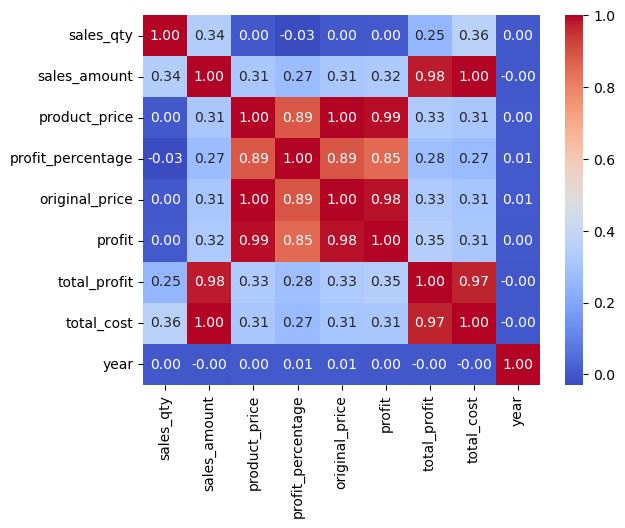

In [147]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()